In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.metrics import mean_squared_error

# Reads in your dataset
dataset = pd.read_csv('/content/gdrive/My Drive/imdb_movies_shows.csv', header=None, skiprows=1)
#Habibuls Path
# dataset = pd.read_csv('/content/gdrive/My Drive/ColabNotebooks/imdb_movies_shows.csv', header=None, skiprows=1)

# Assign meaningful column names
column_names = ['title', 'type', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes']
dataset.columns = column_names

dataset.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [ ]:
#Breaks up the data to test/train sets

# This will drop all the rows with missing values in imdb_score and runtime
dataset = dataset.dropna(subset=['imdb_score', 'runtime'])

#predicting the IMDb scores based on the movie or show's runtime. So X is 'runtime' and y is 'imdb_score'
X = dataset['runtime'].values.reshape(-1, 1)
y = dataset['imdb_score']
print("runtime: \n", X ,"\n\n")
print("imdb_score: \n",y)

runtime: 
 [[113]
 [ 91]
 [ 94]
 ...
 [ 88]
 [116]
 [  0]] 


imdb_score: 
 1       8.3
2       8.2
3       8.0
4       8.1
5       8.8
       ... 
5800    5.8
5801    6.9
5803    6.5
5804    6.2
5805    8.8
Name: imdb_score, Length: 5283, dtype: float64


In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) based on your data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Checks / validates the accuracy   Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.3717477423058677
Mean Absolute Error: 0.8914334435707946


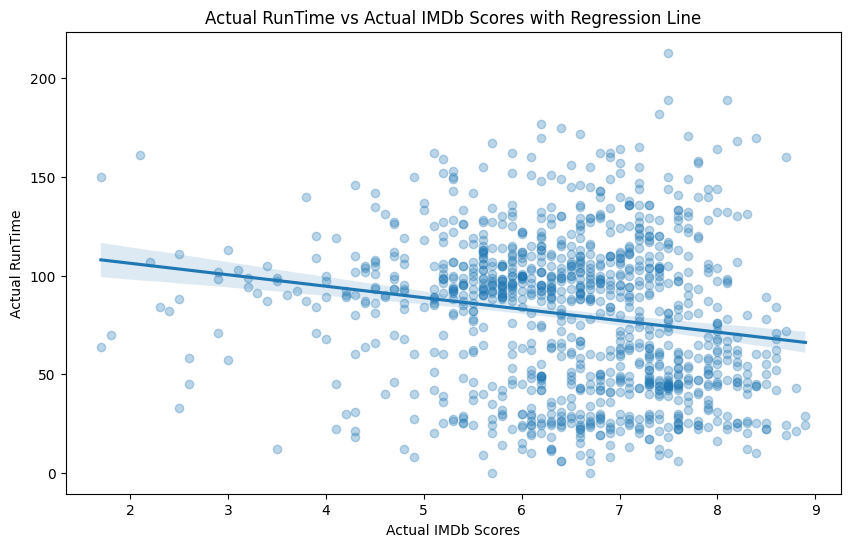

In [ ]:
#Displays a confusion matrix 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=X_test, scatter_kws={'alpha':0.3})
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Actual RunTime")
plt.title("Actual RunTime vs Actual IMDb Scores with Regression Line")
plt.show()


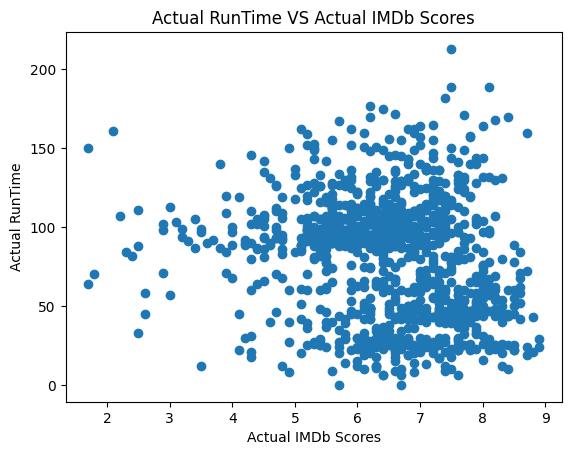

In [ ]:
#Displays a confusion matrix 2
import matplotlib.pyplot as plt

plt.scatter(y_test, X_test)
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Actual RunTime")
plt.title("Actual RunTime VS Actual IMDb Scores")
plt.show()

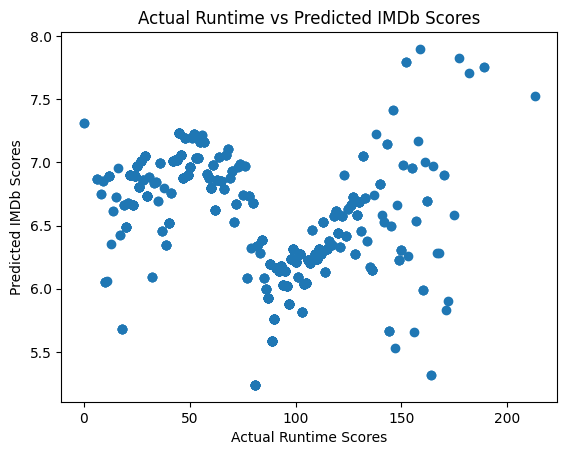

In [ ]:
#Displays a confusion matrix 3
import matplotlib.pyplot as plt

plt.scatter(X_test, y_pred)
plt.xlabel("Actual Runtime Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Actual Runtime vs Predicted IMDb Scores")
plt.show()

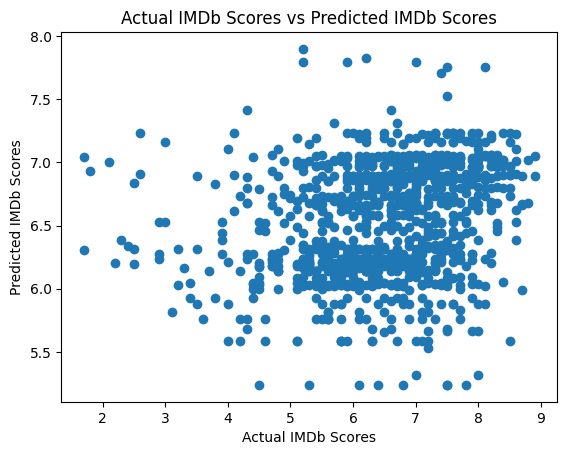

In [ ]:
#Displays a confusion matrix 4
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Actual IMDb Scores vs Predicted IMDb Scores")
plt.show()

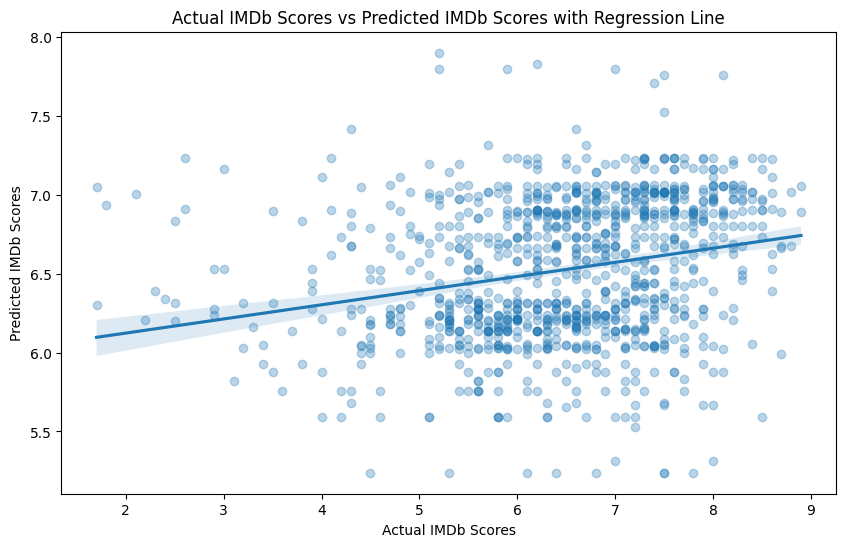

In [ ]:
#Displays a confusion matrix 5
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Actual IMDb Scores vs Predicted IMDb Scores with Regression Line")
plt.show()


In [ ]:
#Pickles (Serialize) your model / encoding scheme

save_directory = '/content/gdrive/My Drive/model_random_forest.pkl'

with open(save_directory, 'wb') as model_file:
    pickle.dump(model, model_file)

App.**py**

In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

#seeing my current directory
import os
print("Current Working Directory:", os.getcwd())


model_path = "/content/gdrive/My Drive/model_random_forest.pkl"
#model_path = "ColabNotebooks/ model.pkl"


# Load the pickled model and any necessary encoding schemes
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

Current Working Directory: /content


In [ ]:
# Implement a route for GET requests to render the input form
@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

In [ ]:
# Implement a route for POST requests
@app.route('/predict', methods=['POST'])
def predict_post():
    try:
        # Retrieve input data from the JSON payload
        data = request.get_json(force=True)

        # Extract relevant features (in this case, runtime)
        runtime = float(data['runtime'])
        # Perform any necessary preprocessing based on your training data

        # Make predictions
        prediction = model.predict([[runtime]])

        # Prepare the response
        response = {'prediction': prediction[0]}
        return jsonify(response)

    except Exception as e:
        return jsonify({'error': str(e)})

# Run the Flask app
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from flask import Flask, request, jsonify, render_template, send_from_directory
from flask_cors import CORS
import pickle
import pandas as pd
import os

app = Flask(__name__)
CORS(app)

# Seeing my current directory
print("Current Working Directory:", os.getcwd())

model_path = "/content/gdrive/My Drive/model_random_forest.pkl"

# Load the pickled model and any necessary encoding schemes
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

# Implement a route for GET requests to render the input form
@app.route('/', methods=['GET'])
def index():
    return render_template('index.html')

@app.route('/static/<path:path>')
def send_static(path):
    return send_from_directory('static', path)

# Implement a route for POST requests
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        runtime = data['Runtime']
        prediction = model.predict([[runtime]])

        response = {'prediction': prediction[0]}
        return render_template("results.html", response)

    except Exception as e:
        return jsonify({'error': str(e)})


# Run the Flask app
if __name__ == '__main__':
    app.run(port=5000)


Current Working Directory: /content
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
